In [12]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..', '')))
print(sys.path)
# Now do your import
import utils

['/Users/lorenzo/Documents/Lorenzo/Università/Magistrale/I anno/01_Mathematics in ML/Project/auslan/auslan-classification/experiments', '/Users/lorenzo/ENTER/envs/data_science/lib/python39.zip', '/Users/lorenzo/ENTER/envs/data_science/lib/python3.9', '/Users/lorenzo/ENTER/envs/data_science/lib/python3.9/lib-dynload', '', '/Users/lorenzo/ENTER/envs/data_science/lib/python3.9/site-packages', '/Users/lorenzo/Documents/Lorenzo/Università/Magistrale/I anno/01_Mathematics in ML/Project/auslan/auslan-classification/utils', '/Users/lorenzo/Documents/Lorenzo/Università/Magistrale/I anno/01_Mathematics in ML/Project/auslan/auslan-classification/utils', '/Users/lorenzo/Documents/Lorenzo/Università/Magistrale/I anno/01_Mathematics in ML/Project/auslan/auslan-classification']


In [16]:
sys.path.remove('')
print(sys.path)

['/Users/lorenzo/Documents/Lorenzo/Università/Magistrale/I anno/01_Mathematics in ML/Project/auslan/auslan-classification/experiments', '/Users/lorenzo/ENTER/envs/data_science/lib/python39.zip', '/Users/lorenzo/ENTER/envs/data_science/lib/python3.9', '/Users/lorenzo/ENTER/envs/data_science/lib/python3.9/lib-dynload', '/Users/lorenzo/ENTER/envs/data_science/lib/python3.9/site-packages', '/Users/lorenzo/Documents/Lorenzo/Università/Magistrale/I anno/01_Mathematics in ML/Project/auslan/auslan-classification']


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import utils


features_1 = [
    'sx_x',
    'sx_y',
    'sx_z',
    'sx_roll',
    'sx_pitch',
    'sx_yaw',
    'sx_thumb',
    'sx_forefinger',
    'sx_middle_finger',
    'sx_ring_finger',
    'sx_little_finger',
    'dx_x',
    'dx_y',
    'dx_z',
    'dx_roll',
    'dx_pitch',
    'dx_yaw',
    'dx_thumb',
    'dx_forefinger',
    'dx_middle_finger',
    'dx_ring_finger',
    'dx_little_finger'
    ]


In [18]:
path = "../tctodd/"
dirs = os.listdir(path=path)
weeks = sorted([i for i in dirs if i != ".DS_Store"])
filenames = sorted(os.listdir(path+weeks[1]))

data = []
labels = dict()
label_cnt = 0

for w in weeks:
    temp_path = path+w+"/"
    filenames = sorted(os.listdir(temp_path))
    for fn in filenames:
        label = fn.split('.')[0][:-2]
        
        if label not in labels:
            labels[label] = label_cnt
            label_cnt += 1
            
        data.append({'label':labels[label], 'time_series':pd.read_csv(temp_path+fn, header=None, sep='\t',).values})
        

In [19]:
df = pd.DataFrame(data, columns=['label', 'time_series'])

In [20]:
num_labels = {v:k for k,v in labels.items()}

In [27]:
idx_shortest_move = df.time_series.apply(lambda x: len(x)).argmin()
shortest_move = df.iloc[idx_shortest_move]
shortest_move

label                                                         48
time_series    [[-0.007019, -0.087708, -0.076279, 0.473107, 0...
Name: 431, dtype: object

In [15]:
num_labels[shortest_move.label]

'mine'

In [16]:
len(shortest_move.time_series)

45

In [48]:
data = shortest_move.time_series
label = num_labels[shortest_move.label]

"plt.tick_params(\n    axis='both',          # changes apply to the x-axis\n    which='both',      # both major and minor ticks are affected\n    bottom=False,      # ticks along the bottom edge are off\n    top=False,         # ticks along the top edge are off\n    labelbottom=False) # labels along the bottom edge are off"

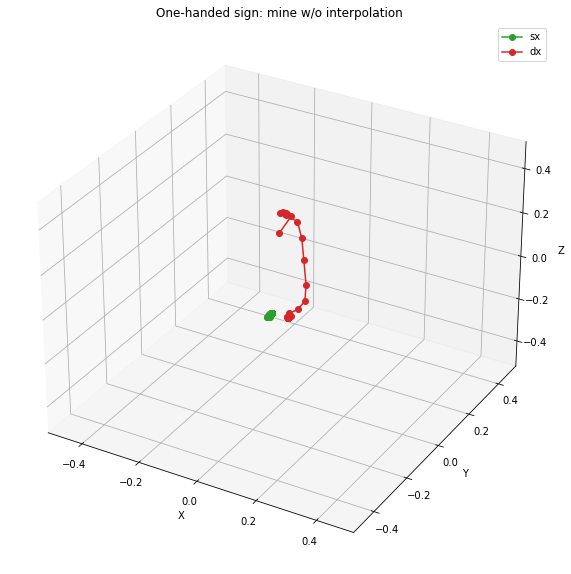

In [45]:
import matplotlib.pyplot as plt
import numpy as np

epsilon = .1

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')
sx_xs = data[:,0][:]
sx_ys = data[:,1][:]
sx_zs = data[:,2][:]
dx_xs = data[:,11][:]
dx_ys = data[:,12][:]
dx_zs = data[:,13][:]

'''
minimum = np.min( [np.min(sx_xs), np.min(sx_ys), np.min(sx_zs), np.min(dx_xs), np.min(dx_ys), np.min(dx_zs)] )
maximum = np.max( [np.max(sx_xs), np.max(sx_ys), np.max(sx_zs), np.max(dx_xs), np.max(dx_ys), np.max(dx_zs)] )

ax.set_xlim(minimum - epsilon, maximum + epsilon)
ax.set_ylim(minimum - epsilon, maximum + epsilon)
ax.set_zlim(minimum - epsilon, maximum + epsilon)
'''

ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_zlim(-0.5, 0.5)

ax.plot(sx_xs, sx_ys, sx_zs, marker='o', label='sx', color='tab:green', alpha=1)
ax.plot(dx_xs, dx_ys, dx_zs, marker='o', label='dx', color='tab:red', alpha=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.title(f'One-handed sign: {num_labels[shortest_move.label]} w/o interpolation')
'''plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off'''

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
for i in range(len(data)):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(projection='3d')
    sx_xs = data[:,0][:i]
    sx_ys = data[:,1][:i]
    sx_zs = data[:,2][:i]
    dx_xs = data[:,11][:i]
    dx_ys = data[:,12][:i]
    dx_zs = data[:,13][:i]

    ax.plot(sx_xs, sx_ys, sx_zs, marker='o', label='sx', color='tab:green', alpha=1)
    ax.plot(dx_xs, dx_ys, dx_zs, marker='o', label='dx', color='tab:red', alpha=1)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    ax.set_xlim(-0.5,0.5)
    ax.set_ylim(-0.5, 0.5)
    ax.set_zlim(-0.5, 0.5)
    
    plt.legend()
    
    plt.title(f'One-handed sign: {label} w/o interpolation')
    
    if i < 10:
        plt.savefig(f"{label}_line_gif_no_interpolation/00{i}_{label}.png", format='png', dpi=300)
    else:
        plt.savefig(f"{label}_line_gif_no_interpolation/0{i}_{label}.png", format='png', dpi=300)

In [59]:
import cv2
import numpy as np
import glob

img_array = []
imgs = []
for filename in glob.glob('mine_line_gif_no_interpolation/*.png'):
    imgs.append(filename)
for filename in sorted(imgs):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)


out = cv2.VideoWriter('mine_no_interpolation.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 10, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

------------
# W/ interpolation

In [22]:
X = df['time_series']
y = df['label']
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from utils import base

seed = 0
n_coords = 60
X_interp = base.interpolate_data(X, n_coords)



In [36]:
len(X.iloc[idx_shortest_move]), len(X_interp[idx_shortest_move])

(45, 60)

In [54]:
interp_data = X_interp[idx_shortest_move]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')
sx_xs = interp_data[:,0][:]
sx_ys = interp_data[:,1][:]
sx_zs = interp_data[:,2][:]
dx_xs = interp_data[:,11][:]
dx_ys = interp_data[:,12][:]
dx_zs = interp_data[:,13][:]

'''
min_sx = np.min( [np.min(sx_xs), np.min(sx_ys), np.min(sx_zs)] )
min_dx = np.min( [np.min(dx_xs), np.min(dx_ys), np.min(dx_zs)] )
max_sx = np.max( [np.max(sx_xs), np.max(sx_ys), np.max(sx_zs)] )
max_dx = np.max( [np.max(dx_xs), np.max(dx_ys), np.max(dx_zs)] )
final_min = np.min([min_sx, min_dx])
final_max = np.max([max_sx, max_dx])

ax.set_xlim(final_min, final_max)
ax.set_ylim(final_min, final_max)
ax.set_zlim(final_min, final_max)
'''

ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_zlim(-0.5, 0.5)

ax.plot(sx_xs, sx_ys, sx_zs, marker='*', label='sx', color='tab:green', alpha=1)
ax.plot(dx_xs, dx_ys, dx_zs, marker='*', label='dx', color='tab:red', alpha=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.title(f'One-handed sign: {num_labels[shortest_move.label]} w/ interpolation')
'''plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off'''

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
for i in range(len(interp_data)):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(projection='3d')
    sx_xs = interp_data[:,0][:i]
    sx_ys = interp_data[:,1][:i]
    sx_zs = interp_data[:,2][:i]
    dx_xs = interp_data[:,11][:i]
    dx_ys = interp_data[:,12][:i]
    dx_zs = interp_data[:,13][:i]

    ax.plot(sx_xs, sx_ys, sx_zs, marker='o', label='sx', color='tab:green', alpha=1)
    ax.plot(dx_xs, dx_ys, dx_zs, marker='o', label='dx', color='tab:red', alpha=1)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    ax.set_xlim(-0.5,0.5)
    ax.set_ylim(-0.5, 0.5)
    ax.set_zlim(-0.5, 0.5)
    
    plt.legend()
    
    plt.title(f'One-handed sign: {label} w/ interpolation')
    
    if i < 10:
        plt.savefig(f"{label}_line_gif_interpolation/00{i}_{label}.png", format='png', dpi=300)
    else:
        plt.savefig(f"{label}_line_gif_interpolation/0{i}_{label}.png", format='png', dpi=300)

In [61]:
import cv2
import numpy as np
import glob

img_array = []
imgs = []
for filename in glob.glob('mine_line_gif_interpolation/*.png'):
    imgs.append(filename)
for filename in sorted(imgs):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)


out = cv2.VideoWriter('mine_interpolation.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 10, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

# Comparison between interpolation and not interpolation

In [30]:
import matplotlib.pyplot as plt

In [28]:
idx_shortest_move = df.time_series.apply(lambda x: len(x)).argmin()
idx_longest_move = df.time_series.apply(lambda x: len(x)).argmax()

In [153]:
a = X.iloc[idx_shortest_move]
a_interp = X_interp.iloc[idx_shortest_move]
a.shape, a_interp.shape

((45, 22), (60, 22))

In [154]:
n_old_coords = a.shape[0]
n_new_coords = 60
np.linspace(0, n_old_coords, n_new_coords).shape, a_interp[:,0].shape

((60,), (60,))

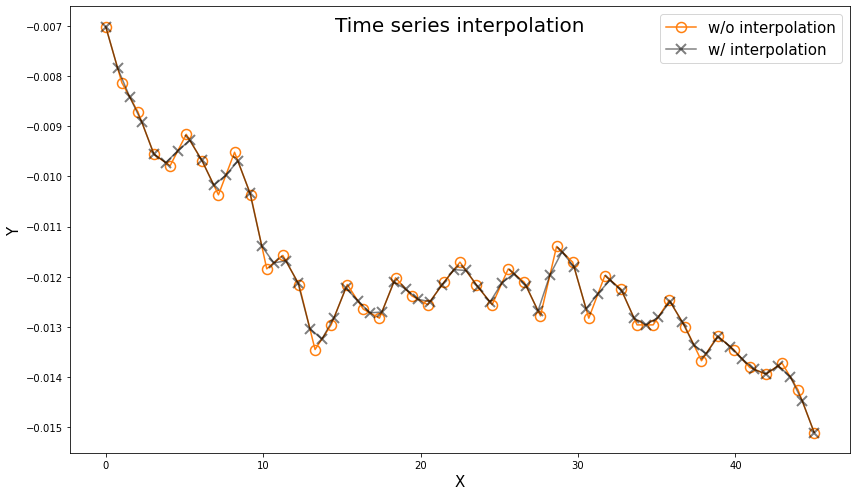

In [158]:
#a = X.iloc[idx_longest_move]
#a_interp = X_interp.iloc[idx_longest_move]

n_old_coords = a.shape[0]
n_new_coords = 60
x_vals = np.linspace(0, n_old_coords, n_new_coords)
x_indexes = np.linspace(0, n_old_coords, n_old_coords)
yinterp = np.interp(np.linspace(0, n_old_coords-1, num=n_new_coords), np.array(list(range(n_old_coords))), a[:, 0])
#fig, ax = plt.subplots(figsize=(12,10))
plt.figure(figsize=(12,7))
plt.plot(x_indexes, a[:,0], label='w/o interpolation', marker='o', color='tab:orange', markersize=10, fillstyle='none', mew=1.5)#, linewidth=5)
plt.plot(x_vals, yinterp, label='w/ interpolation', marker='x', color='k', alpha=.5, markersize=10, mew=2)#, fillstyle='none')
plt.legend(prop={'size': 15})
#plt.yticks([])
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title("Time series interpolation", y=.93, fontsize=20)
plt.tight_layout()
plt.savefig('Interpolation.png', format='png', dpi=300)
plt.show()

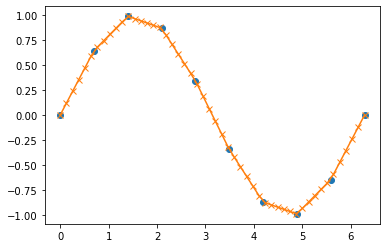

In [51]:
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)
xvals = np.linspace(0, 2*np.pi, 50)
yinterp = np.interp(xvals, x, y)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o')
plt.plot(xvals, yinterp, '-x')
plt.show()